In [1]:
# !pip install wget

In [2]:
# import zipfile

In [3]:
# data = "https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip"
# !python -m wget $data -o data.zip

# zip_file = "data.zip" 
# extract_to = "./extracted_data"

# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)
#     print(f"Extracted files to: {extract_to}")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

2024-12-06 12:00:38.594396: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 12:00:38.612967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733486438.633148   19337 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733486438.639339   19337 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 12:00:38.659952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
tf.__version__

'2.18.0'

In [6]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import SGD

In [8]:
path = './extracted_data/data/t-shirt'
fullname = f'{path}'

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733486440.821568   19337 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


### No 1

In [10]:
model.compile(optimizer=SGD(learning_rate=0.002, momentum=0.8), 
              loss="binary_crossentropy", metrics=["accuracy"])

### No 2

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train = ImageDataGenerator(rescale=1./255)

In [14]:
train_gen = train.flow_from_directory("./extracted_data/data/train", 
                                      target_size=(200, 200), batch_size=20,
                                      shuffle=True, class_mode="binary")

Found 800 images belonging to 2 classes.


In [15]:
!ls -l extracted_data/data/train

total 48
drwxrwsr-x 2 jovyan jovyan 20480 Dec  2 00:22 curly
drwxrwsr-x 2 jovyan jovyan 20480 Dec  2 00:22 straight


In [16]:
test = ImageDataGenerator(rescale=1./255)
test_gen = test.flow_from_directory("./extracted_data/data/test", 
                                    target_size=(200, 200), batch_size=20,
                                    shuffle=True, class_mode="binary")

Found 201 images belonging to 2 classes.


In [17]:
history = model.fit(train_gen, epochs=10, validation_data=test_gen)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733486443.481429   19409 service.cc:148] XLA service 0x7f0e98003990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733486443.481465   19409 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-06 12:00:43.510845: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733486443.597523   19409 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 12:00:43.881474: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"

 3/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4194 - loss: 0.7425

I0000 00:00:1733486445.026414   19409 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5532 - loss: 0.6888

2024-12-06 12:00:49.743985: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,198,198]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.5544 - loss: 0.6880 - val_accuracy: 0.6368 - val_loss: 0.6223
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.6662 - loss: 0.6053 - val_accuracy: 0.6418 - val_loss: 0.6192
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6997 - loss: 0.5536 - val_accuracy: 0.6567 - val_loss: 0.6249
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7259 - loss: 0.5490 - val_accuracy: 0.5721 - val_loss: 0.7026
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6957 - loss: 0.5635 - val_accuracy: 0.6418 - val_loss: 0.6295
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7574 - loss: 0.5116 - val_accuracy: 0.6716 - val_loss: 0.6102
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7551 - loss: 0.5074 - val_accuracy: 0.6816 - val_loss: 0.6227
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7890 - loss: 0.4829 - val_accuracy: 0.6567 - val_

In [18]:
history.history

{'accuracy': [0.6012499928474426,
  0.6712499856948853,
  0.6887500286102295,
  0.7137500047683716,
  0.706250011920929,
  0.7462499737739563,
  0.7487499713897705,
  0.7787500023841858,
  0.7712500095367432,
  0.7699999809265137],
 'loss': [0.6533896923065186,
  0.5983843803405762,
  0.580007016658783,
  0.5538290143013,
  0.5497908592224121,
  0.5230856537818909,
  0.5067254900932312,
  0.48654624819755554,
  0.4755897521972656,
  0.48372650146484375],
 'val_accuracy': [0.6368159055709839,
  0.641791045665741,
  0.6567164063453674,
  0.572139322757721,
  0.641791045665741,
  0.6716417670249939,
  0.6815920472145081,
  0.6567164063453674,
  0.676616907119751,
  0.6268656849861145],
 'val_loss': [0.6223081946372986,
  0.6192444562911987,
  0.6248947381973267,
  0.7026378512382507,
  0.6294825673103333,
  0.6102294325828552,
  0.6226873993873596,
  0.5988038182258606,
  0.598345160484314,
  0.6995453834533691]}

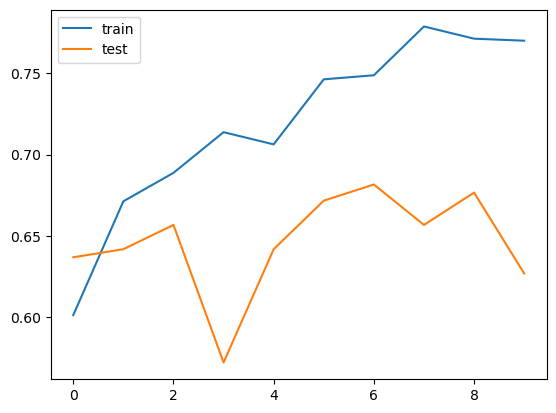

In [19]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="test")
# plt.xticks(np.arange(10))
plt.legend()

### No 3

In [20]:
median = np.median(history.history["accuracy"])
median

np.float64(0.7299999892711639)

### No 4

In [21]:
std_train_loss = np.std(history.history["loss"])
std_train_loss

np.float64(0.054504436328710264)

In [22]:
train = ImageDataGenerator(rescale=1./255, rotation_range=50, width_shift_range=0.1,
                          height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True,
                          fill_mode="nearest")
train_gen = train.flow_from_directory("./extracted_data/data/train", 
                                      target_size=(200, 200), batch_size=20,
                                      shuffle=True, class_mode="binary")

Found 800 images belonging to 2 classes.


In [23]:
history = model.fit(train_gen, epochs=10, validation_data=test_gen)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.5960 - loss: 0.6350 - val_accuracy: 0.6468 - val_loss: 0.5783
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.6756 - loss: 0.6034 - val_accuracy: 0.6816 - val_loss: 0.5696
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.6765 - loss: 0.6111 - val_accuracy: 0.7065 - val_loss: 0.5652
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.6772 - loss: 0.5994 - val_accuracy: 0.6716 - val_loss: 0.6245
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - accuracy: 0.6639 - loss: 0.6071 - val_accuracy: 0.7313 - val_loss: 0.5525
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.6967 - loss: 0.5846 - val_accuracy: 0.6915 - val_loss: 0.6040
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.6941 - loss: 0.5950 - val_accuracy: 0.6567 - val_loss: 0.6253
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.7310 - loss: 0.5587 - val_accu

In [24]:
history.history

{'accuracy': [0.6150000095367432,
  0.6875,
  0.6800000071525574,
  0.699999988079071,
  0.65625,
  0.6837499737739563,
  0.6899999976158142,
  0.7124999761581421,
  0.7112500071525574,
  0.699999988079071],
 'loss': [0.630435585975647,
  0.6000000238418579,
  0.6019496917724609,
  0.5858417749404907,
  0.6064015030860901,
  0.5921674966812134,
  0.5853064656257629,
  0.5705509781837463,
  0.5724237561225891,
  0.5717432498931885],
 'val_accuracy': [0.646766185760498,
  0.6815920472145081,
  0.7064676880836487,
  0.6716417670249939,
  0.7313432693481445,
  0.6915422677993774,
  0.6567164063453674,
  0.7064676880836487,
  0.7064676880836487,
  0.6915422677993774],
 'val_loss': [0.5783068537712097,
  0.5695987939834595,
  0.5651612877845764,
  0.6244973540306091,
  0.5525220036506653,
  0.6040146350860596,
  0.6252517104148865,
  0.5510767698287964,
  0.5394549369812012,
  0.5464929938316345]}

### No 5

In [25]:
mean_test_loss = np.mean(history.history["val_loss"])
mean_test_loss

np.float64(0.5756377339363098)

### No 6

In [27]:
avg_test_acc = np.average(history.history["val_accuracy"][6:11])
avg_test_acc

np.float64(0.6902985125780106)